In [2]:
import requests
import pandas as pd
import pprint
import matplotlib.pyplot as plt

api_key = "a1cb41a49a32541884d183c47835f12776b1750a"
base_url = "https://api.census.gov/data/2020/dec/pl"

params = {
    'get': 'NAME,P1_001N',  # Unemployed, Employed, Total Population (16+)
    'for': 'state:*',  # Get data for all states
    #'key': api_key     # Your API key
}

In [2]:
# Make the API request

#final_url = f"{base_url}"

response = requests.get(base_url, params=params)

#response = response.json()



# Check if the response was successful
if response.status_code == 200:
    data = response.json()
    pprint.pprint(data)
    df = pd.DataFrame(data[1:], columns=data[0])  # Extract columns and data
    # Convert relevant columns to numeric
    # df['B23025_003E'] = pd.to_numeric(df['B23025_003E'], errors='coerce')  # Unemployed
    # df['B23025_005E'] = pd.to_numeric(df['B23025_005E'], errors='coerce')  # Employed
    # df['B23025_001E'] = pd.to_numeric(df['B23025_001E'], errors='coerce')  # Total Population
    df['P1_001N'] = pd.to_numeric(df['P1_001N'], errors='coerce')

    # Calculate unemployment rate
    #df['Unemployment_Rate'] = (df['B23025_003E'] / df['B23025_001E']) * 100  # Unemployment rate in %
    
    # Show the result
    #print(df[['NAME', 'Unemployment_Rate']])
    #df.head()
else:
    print("Error:", response.status_code)


[['NAME', 'P1_001N', 'state'],
 ['Pennsylvania', '13002700', '42'],
 ['California', '39538223', '06'],
 ['West Virginia', '1793716', '54'],
 ['Utah', '3271616', '49'],
 ['New York', '20201249', '36'],
 ['District of Columbia', '689545', '11'],
 ['Alaska', '733391', '02'],
 ['Florida', '21538187', '12'],
 ['South Carolina', '5118425', '45'],
 ['North Dakota', '779094', '38'],
 ['Maine', '1362359', '23'],
 ['Georgia', '10711908', '13'],
 ['Alabama', '5024279', '01'],
 ['New Hampshire', '1377529', '33'],
 ['Oregon', '4237256', '41'],
 ['Wyoming', '576851', '56'],
 ['Arizona', '7151502', '04'],
 ['Louisiana', '4657757', '22'],
 ['Indiana', '6785528', '18'],
 ['Idaho', '1839106', '16'],
 ['Connecticut', '3605944', '09'],
 ['Hawaii', '1455271', '15'],
 ['Illinois', '12812508', '17'],
 ['Massachusetts', '7029917', '25'],
 ['Texas', '29145505', '48'],
 ['Montana', '1084225', '30'],
 ['Nebraska', '1961504', '31'],
 ['Ohio', '11799448', '39'],
 ['Colorado', '5773714', '08'],
 ['New Jersey', '928

<Axes: xlabel='date'>

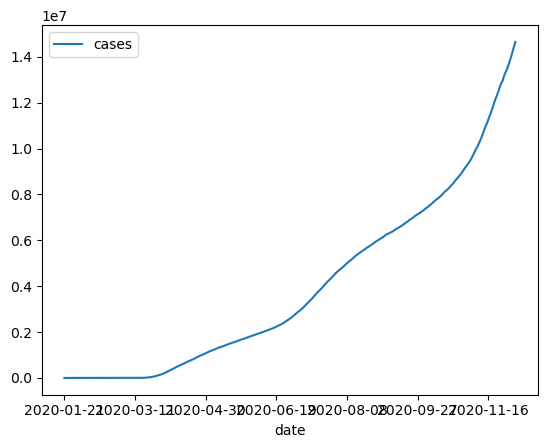

In [3]:
counties_covid = "../Project 1/Data/us_counties_covid19_daily.csv"

counties_covid_df = pd.read_csv(counties_covid)

counties_covid_df = counties_covid_df[["date", "county", "state", "cases", "deaths"]]

counties_covid_df.head()

date_df = counties_covid_df.groupby("date").sum()

date_df

date_df.plot(y = "cases", kind = "line")

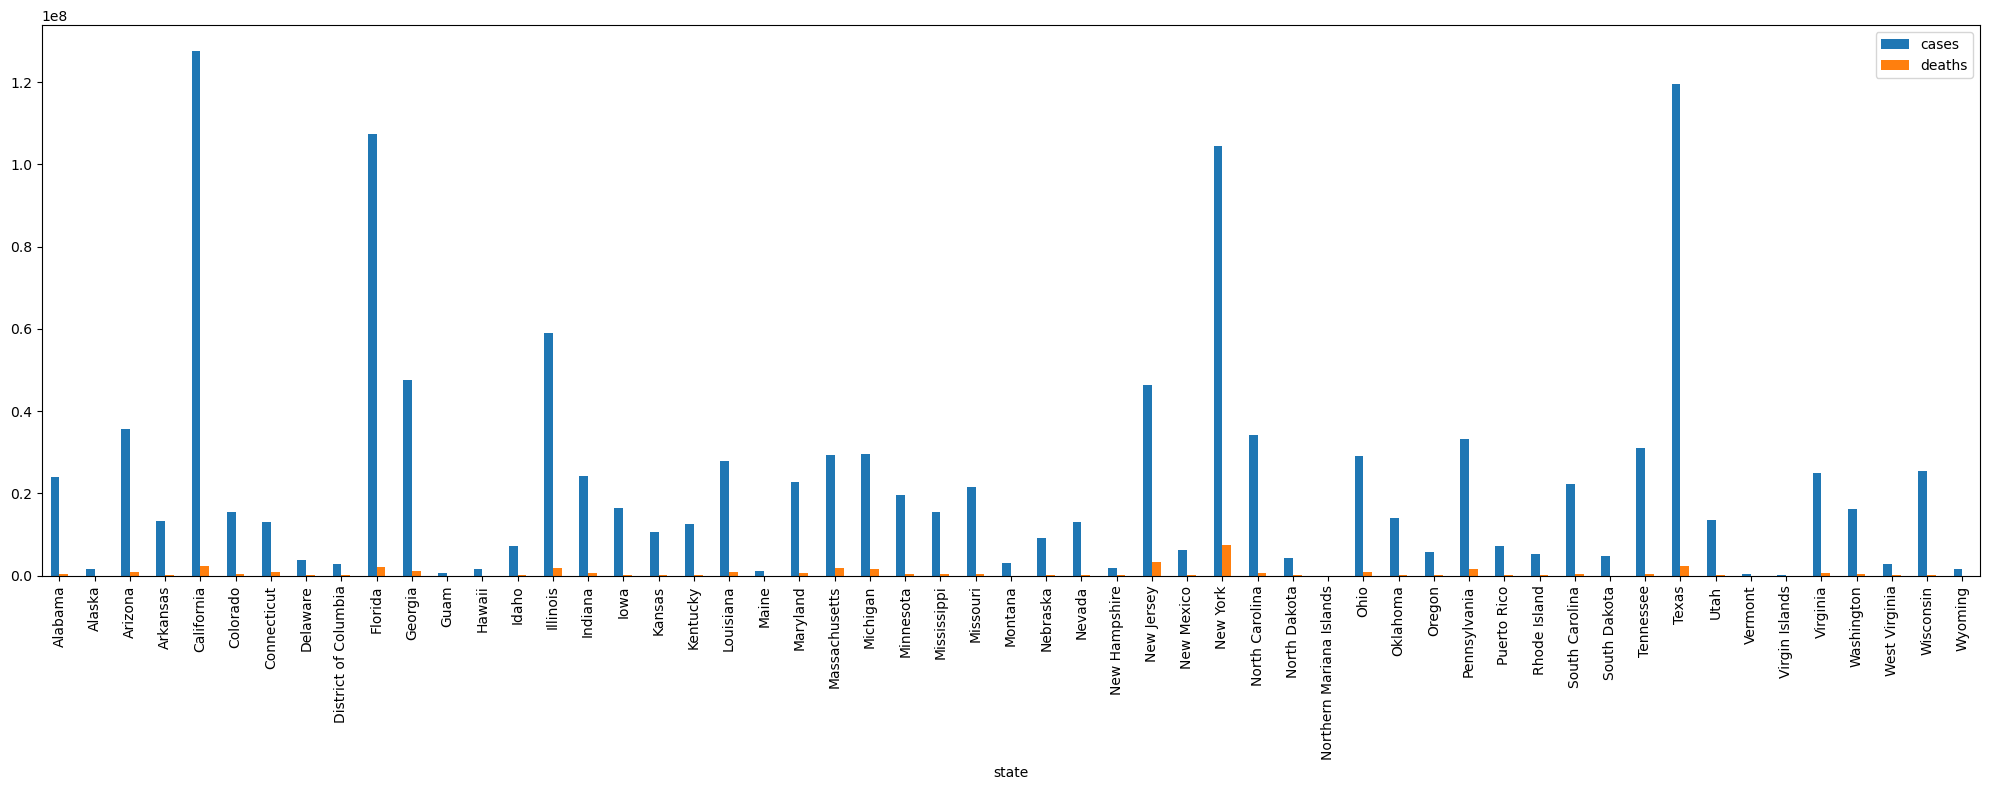

In [4]:
counties_covid_df.head()

c_df = counties_covid_df.groupby("state").sum()

c_df.plot(kind = "bar", figsize = (20, 8))

plt.tight_layout()

plt.show()

Skipping Guam
Skipping Northern Mariana Islands
Skipping Virgin Islands
{'Alabama': 5024279, 'Alaska': 733391, 'Arizona': 7151502, 'Arkansas': 3011524, 'California': 39538223, 'Colorado': 5773714, 'Connecticut': 3605944, 'Delaware': 989948, 'District of Columbia': 689545, 'Florida': 21538187, 'Georgia': 10711908, 'Hawaii': 1455271, 'Idaho': 1839106, 'Illinois': 12812508, 'Indiana': 6785528, 'Iowa': 3190369, 'Kansas': 2937880, 'Kentucky': 4505836, 'Louisiana': 4657757, 'Maine': 1362359, 'Maryland': 6177224, 'Massachusetts': 7029917, 'Michigan': 10077331, 'Minnesota': 5706494, 'Mississippi': 2961279, 'Missouri': 6154913, 'Montana': 1084225, 'Nebraska': 1961504, 'Nevada': 3104614, 'New Hampshire': 1377529, 'New Jersey': 9288994, 'New Mexico': 2117522, 'New York': 20201249, 'North Carolina': 10439388, 'North Dakota': 779094, 'Ohio': 11799448, 'Oklahoma': 3959353, 'Oregon': 4237256, 'Pennsylvania': 13002700, 'Puerto Rico': 3285874, 'Rhode Island': 1097379, 'South Carolina': 5118425, 'South 

<Axes: xlabel='state'>

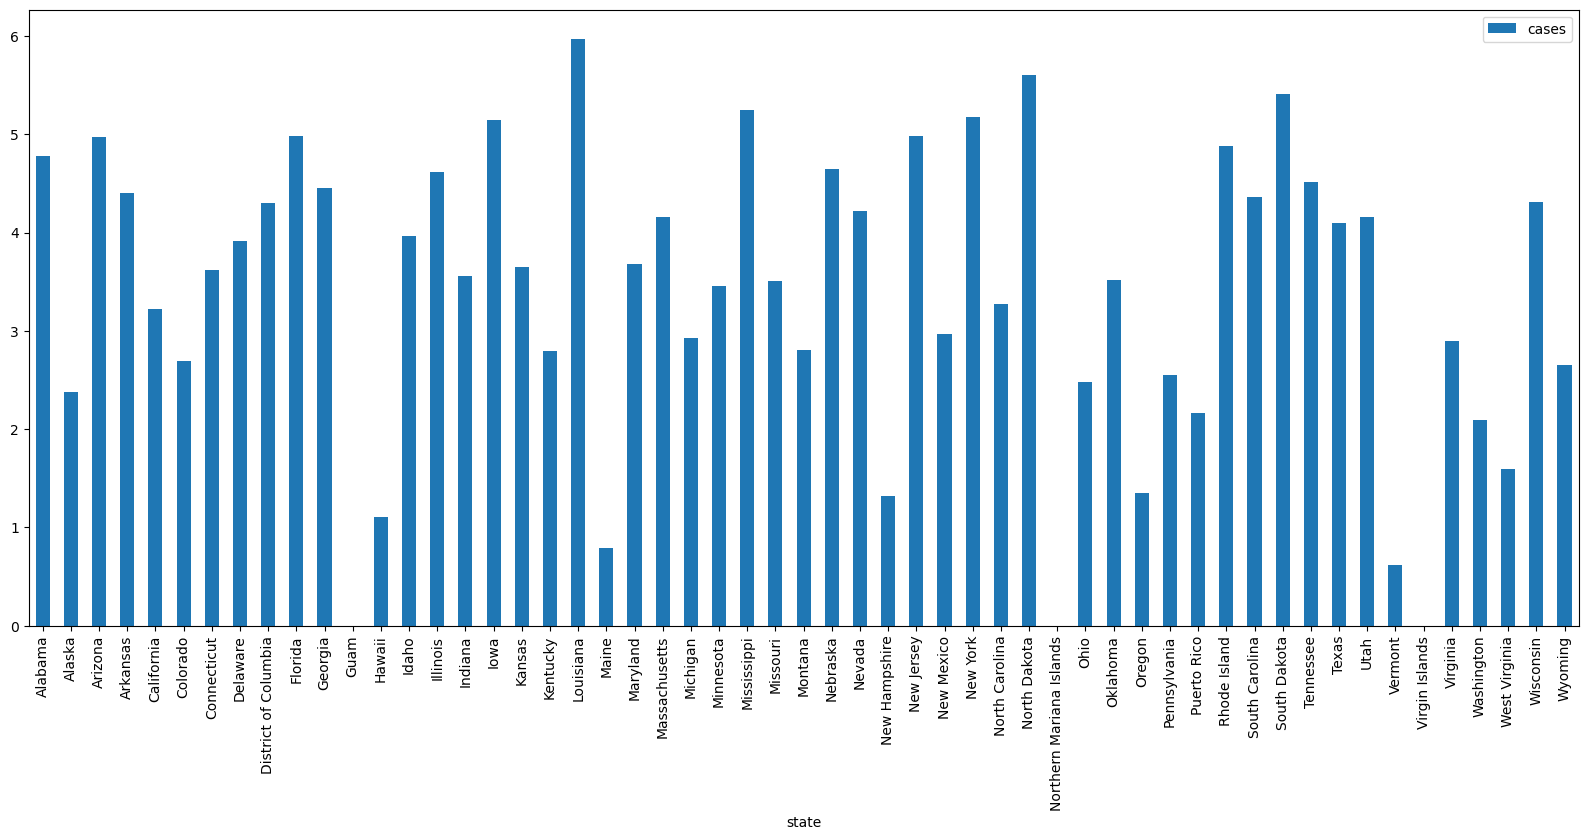

In [5]:
per_10K = c_df

pop_df = df.set_index("NAME")

pop_df.loc["Florida"]["P1_001N"]

#new_df = pd.merge()

total_populations = {}

for index, row in c_df.iterrows():
    try:
        total_populations[index] = pop_df.loc[index]["P1_001N"]
    except:
        print(f"Skipping {index}")
        per_10K.drop(index)

print(total_populations)

p = pd.Series(total_populations)
p.head()

per_10K["Total Pop"] = p
per_10K["cases"] = per_10K["cases"] / per_10K["Total Pop"]
per_10K["deaths"] = per_10K["deaths"] / per_10K["Total Pop"]
#per_10K
#per_10K["cases"] = per_10K["cases"] / total_populations

per_10K.plot(y = "cases", kind= "bar", figsize = (20, 8))

#per_10K.head()



In [3]:
demo_csv = pd.read_csv("../Project 1/demographics.csv")

demo_df = pd.DataFrame(demo_csv)

demo_df.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
